In [66]:
import pandas as pd
import cv2
import numpy as np
from PIL import Image
import json
from keras.models import model_from_json
import matplotlib.pyplot as plt
import face_recognition
from pathlib import Path
import os

In [3]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [237]:
folder_faces = Path.cwd().parent.joinpath('imgs_faces')

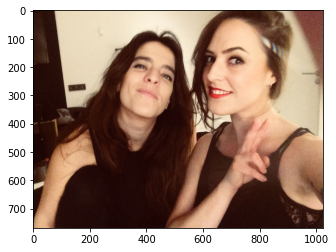

In [5]:
image = Image.open(pth)
plt.imshow(image)

In [6]:
def openImageAndDetectFaces1(path):
    image = face_recognition.load_image_file(path)
    face_locations = face_recognition.face_locations(image)
    try:
        print("I found {} face(s) in this photograph.".format(len(face_locations)))
        for face_location in face_locations:
            top, right, bottom, left = face_location
            face_image = image[top:bottom, left:right]
            face_image = cv2.cvtColor(face_image, cv2.COLOR_RGB2GRAY)
            pil_image = Image.fromarray(face_image)
            plt.imshow(pil_image)
            return new_size(pil_image)
    except ValueError as e:
        print(f"No face found")
        
        
def new_size(img):
    size=(48,48)
    convert_from = img.resize(size)
    face=np.asarray(convert_from)/255
    return face

I found 2 face(s) in this photograph.


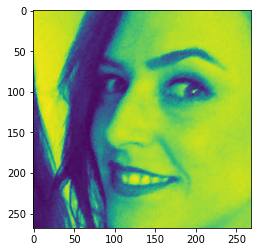

In [7]:
face = openImageAndDetectFaces1(pth)

In [241]:
from glob import glob

In [244]:
folder_imgs = Path.cwd().parent/'imgs'

In [246]:
folder_imgs

PosixPath('/Users/cris/Iron/ReadingyourAudience/imgs')

In [248]:
contents = []
for files in folder_imgs.iterdir():
    with open(fname, "r") as f:
        contents.append(f.read())

TypeError: 'PosixPath' object is not iterable

In [251]:
contents = []
for files in folder_imgs.iterdir():
    if files.suffix == '.jpg':
        print(files)

/Users/cris/Iron/ReadingyourAudience/imgs/im33.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im7.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im27.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im26.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im6.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im32.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im24.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im30.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im4.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im18.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im19.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im5.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im31.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im25.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im21.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im35.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im1.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im34.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im20.jpg
/Users/cris/Iron/ReadingyourAudience

In [245]:
contents = []
for files in glob(folder_imgs, recursive=True):
    image = face_recognition.load_image_file(ab_pth)
    print(image)

TypeError: expected string or bytes-like object

In [242]:
folder_imgs = Path.cwd().parent/'imgs'

PosixPath('/Users/cris/Iron/ReadingyourAudience/imgs')

In [238]:
folder_faces = Path.cwd().parent.joinpath('imgs_faces')

In [239]:
folder_faces2 = Path.cwd().parent/'imgs_faces'

In [240]:
folder_faces2

PosixPath('/Users/cris/Iron/ReadingyourAudience/imgs_faces')

In [252]:
folder_faces = Path.cwd().parent/'imgs_faces'
folder_imgs = Path.cwd().parent/'imgs'
contents = []
for files in folder_imgs.iterdir():
    if files.suffix == '.jpg':
        print(files)

/Users/cris/Iron/ReadingyourAudience/imgs/im33.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im7.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im27.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im26.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im6.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im32.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im24.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im30.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im4.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im18.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im19.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im5.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im31.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im25.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im21.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im35.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im1.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im34.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im20.jpg
/Users/cris/Iron/ReadingyourAudience

In [253]:
folder_imgs = Path.cwd().parent/'imgs'
folder_faces = Path.cwd().parent/'imgs_faces'
for files in folder_imgs.iterdir():
    if files.suffix == '.jpg':

In [254]:
folder_imgs

PosixPath('/Users/cris/Iron/ReadingyourAudience/imgs')

In [255]:
pth = "../imgs/"
file = "im14"
ext = ".jpg"
ab_pth = pth+file+ext

def openImageAndDetectFaces2(ab_pth):
    
    image = face_recognition.load_image_file(ab_pth)
    face_locations = face_recognition.face_locations(image)
    count = 0
    try:
        print("I found {} face(s) in this photograph.".format(len(face_locations)))
        #plt.subplot(121)
        plt.imshow(image)
        for feis in face_locations:
            count+=1
            top, right, bottom, left = feis
            face_image = image[top:bottom, left:right]
            face_image = cv2.cvtColor(face_image, cv2.COLOR_RGB2GRAY)
            pil_image = Image.fromarray(face_image)
            fig, axarr = plt.subplots(len(face_locations),1)
            #plt.subplot(121)
            #plt.imshow(image)
            plt.subplot(121)
            plt.imshow(new_size(pil_image))
            #image_name = os.path.join(subfolder, '{:05d}.jpg'.format(i))
            #im.save(image_name)
            #print(pil_image)
            face_in_pic_pth = pth+file+f"_face{count}"+ext
            cv2.imwrite(face_in_pic_pth, face_image)
            print(face_in_pic_pth)
            #return new_size(pil_image)
    except ValueError as e:
        print(f"No face found")
        return pil_image
     
        
def new_size(img):
    size=(48,48)
    convert_from = img.resize(size)
    face=np.asarray(convert_from)/255
    return face

I found 4 face(s) in this photograph.
../imgs/im14_face1.jpg
../imgs/im14_face2.jpg
../imgs/im14_face3.jpg
../imgs/im14_face4.jpg


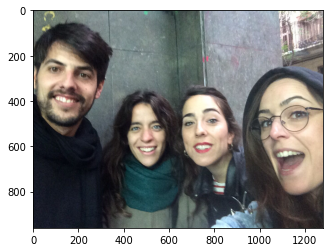

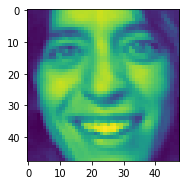

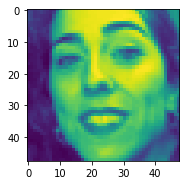

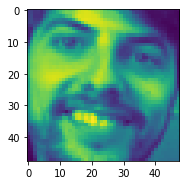

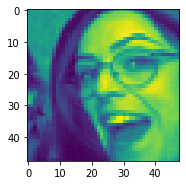

In [256]:
face = openImageAndDetectFaces2("../imgs/im13.jpg")

In [293]:
folder_imgs = Path.cwd().parent/'imgs'
folder_faces = Path.cwd().parent/'imgs_faces'

for files in folder_imgs.iterdir():
    print(files)
print(type(str(folder_faces/files)))
print(files.name)
print(type(folder_faces/files.name))
folder_faces/file

/Users/cris/Iron/ReadingyourAudience/imgs/.DS_Store
/Users/cris/Iron/ReadingyourAudience/imgs/im33.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im7.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im27.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im26.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im6.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im32.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im24.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im30.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im4.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im18.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im19.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im5.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im31.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im25.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im21.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im35.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im1.jpg
/Users/cris/Iron/ReadingyourAudience/imgs/im34.jpg
/Users/cris/Iron/ReadingyourAudienc

PosixPath('/Users/cris/Iron/ReadingyourAudience/imgs_faces/im14')

In [277]:
folder_faces/file

PosixPath('/Users/cris/Iron/ReadingyourAudience/imgs_faces')

In [267]:
face_in_pic_pth

NameError: name 'face_in_pic_pth' is not defined

In [309]:
count=0
for f in folder_imgs.iterdir():
    count+=1
    
    print(f.name)
    print(f.name.replace(".",f"_face{count}."))

.DS_Store
_face1.DS_Store
im33.jpg
im33_face2.jpg
im7.jpg
im7_face3.jpg
im27.jpg
im27_face4.jpg
im26.jpg
im26_face5.jpg
im6.jpg
im6_face6.jpg
im32.jpg
im32_face7.jpg
im24.jpg
im24_face8.jpg
im30.jpg
im30_face9.jpg
im4.jpg
im4_face10.jpg
im18.jpg
im18_face11.jpg
im19.jpg
im19_face12.jpg
im5.jpg
im5_face13.jpg
im31.jpg
im31_face14.jpg
im25.jpg
im25_face15.jpg
im21.jpg
im21_face16.jpg
im35.jpg
im35_face17.jpg
im1.jpg
im1_face18.jpg
im34.jpg
im34_face19.jpg
im20.jpg
im20_face20.jpg
im36.jpg
im36_face21.jpg
im2.jpg
im2_face22.jpg
im22.jpg
im22_face23.jpg
im23.jpg
im23_face24.jpg
im3.jpg
im3_face25.jpg
im12.jpg
im12_face26.jpg
im13.jpg
im13_face27.jpg
im11.jpg
im11_face28.jpg
im10.jpg
im10_face29.jpg
im8.jpg
im8_face30.jpg
im28.jpg
im28_face31.jpg
im14.jpg
im14_face32.jpg
im15.jpg
im15_face33.jpg
im29.jpg
im29_face34.jpg
im9.jpg
im9_face35.jpg
im17.jpg
im17_face36.jpg
im16.jpg
im16_face37.jpg
.ipynb_checkpoints
_face38.ipynb_checkpoints


In [335]:
"""
pth = "../imgs/"
file = "im14"
ext = ".jpg"
ab_pth = pth+file+ext
"""

def openImageAndDetectFaces3(paaath):
    for file in sorted(paaath.iterdir()):
        if file.suffix == '.jpg':
            image = face_recognition.load_image_file(file)
            face_locations = face_recognition.face_locations(image)
            count = 0
            try:
                #print(f"I found {len(face_locations)} face(s) in photograph {file.name}.")
                #plt.subplot(121)
                #plt.imshow(image)
                for feis in face_locations:
                    count+=1
                    top, right, bottom, left = feis
                    face_image = image[top:bottom, left:right]
                    face_image = cv2.cvtColor(face_image, cv2.COLOR_RGB2GRAY)
                    pil_image = Image.fromarray(face_image)
                    reshaped_image = modify_size(pil_image)
                    #fig, axarr = plt.subplots(len(face_locations),1)
                    #plt.subplot(121)
                    #plt.imshow(new_size(pil_image))
                    f.name.replace(".",f"_face{count}.")
                    file_face = file.name.replace(".",f"_face{count}.")
                    file_pil = file.name.replace(".",f"_pil{count}.")
                    file_reshaped = file.name.replace(".",f"_reshaped{count}.")
                    cv2.imwrite(str(folder_faces/file_face), face_image)
                    #cv2.imwrite(str(folder_faces/file_pil), pil_image)
                    #cv2.imwrite(str(folder_faces/file_reshaped), reshaped_image)
                    #cv2.imwrite(str(folder_faces/file.name)+f"_face{count}", face_image)
                    #return new_size(pil_image)
            except ValueError as e:
                print(f"No face found")
                
    return modify_size(pil_image)

        
def modify_size(img):
    size=(48,48)
    convert_from = img.resize(size)
    face=np.asarray(convert_from)/255
    return face

In [336]:
face = openImageAndDetectFaces3(folder_imgs)

In [334]:
os.system('say -v Jorge Ya he terminado');

In [22]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [1]:
image = cv2.imread(pth)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# now we can try to detect faces
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

# Draw a rectangle around the faces and display on screen
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2.imshow("Faces found", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

I found 4 face(s) in this photograph.


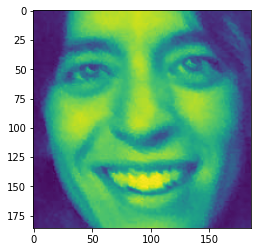

In [20]:
face = openImageAndDetectFaces("../imgs/origsmall14.jpg")